## SVM 101

Support vector machine is used as a supervised learning algorithm in ML for classification and regression use.

SVM can be quite useful when it comes to binary problems such as classify elements between two classes.

Please use this code as you please #open-source


In [ ]:
# @title Basic SVM code #open-source
# @markdown Author: Marc Haraoui

# @markdown Year of update: 2023

## Create the data

### Import main modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from sklearn import svm

### Data creation

In [78]:
# Plot function
def plot_data(x, y, xlength, ylength,radius):
    plt.scatter(x[:,0], x[:,1], c=y, s=radius, cmap='viridis')
    plt.xlim(xlength)
    plt.ylim(ylength)

In [79]:
x = np.array([[0, 3], [3, 1], [0, 0],[0, 1]])

y = np.array([-1, -1, 1, 1]) # first 2 points are from class C1, and the other 2 are in C2 (y is used for coloring the points)

# Print data info
print(f"All points coordination: \n{x}")
print(f"Points coordination in x axis: \n{x[:,0]}")
print(f"Points coordination in x axis: \n{x[:,1]}")

All points coordination: 
[[0 3]
 [3 1]
 [0 0]
 [0 1]]
Points coordination in x axis: 
[0 3 0 0]
Points coordination in x axis: 
[3 1 0 1]


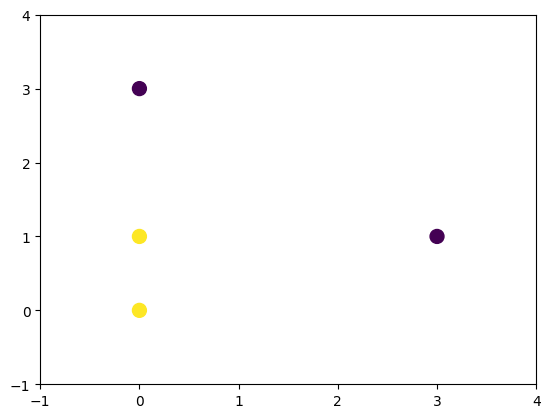

In [80]:
# Plotting the data
plot_data(x, y, (-1,4), (-1,4), 100)

## Linear SVM in primal form

### All functions used

In [92]:
def plot(x,y):
  plot_data(x,y, (-1,4), (-1,4), 100)

In [103]:
def linear_seperator(w, b, xlength, ylength):
    x1 = xlength[0]
    y1 = -(b+(w[0]*x1))/w[1]
    x2 = xlength[1]
    y2 = -(b+(w[0]*x2))/w[1]

    plt.plot((x1, x2), (y1, y2))
    plt.xlim(xlength)
    plt.ylim(ylength)

In [121]:
def primal(x,y, C=1):
    N = x.shape[0]
    n = x.shape[1]

    q  = np.concatenate((np.zeros((n+1,1)),C*np.ones((N,1))),axis = 0)
    q  = cvxopt.matrix(q)
    P1 = np.zeros((1, 1+n+N))
    P2 = np.concatenate((np.zeros((n,1)),np.eye(n), np.zeros((n,N))),axis=1)
    P3 = np.zeros((N, 1+n+N))
    P  = np.concatenate((P1, P2, P3),axis=0)
    P  = cvxopt.matrix(P)

    for i in range(N):
        g = np.concatenate((np.reshape(-y[i],(1,1)), np.reshape(-y[i]*x[i][:],(1,2))),axis=1)
        if i==0:
            G = g
        else:
            G = np.concatenate((G, g), axis=0)

    G  = np.concatenate((G,-np.eye(N)),axis=1)
    G2 = np.concatenate((np.zeros((N,n+1)),-np.eye(N)),axis = 1)
    G  = np.concatenate((G,G2),axis =0)
    G  = cvxopt.matrix(G+0.)

    h   = np.concatenate((-np.ones((N,1)),np.zeros((N,1))),axis =0)
    h   = cvxopt.matrix(h)
    ret = cvxopt.solvers.qp(P, q, G, h)
    w   = [ret['x'][1],ret['x'][2]]
    b   = ret['x'][0]

    return w, b


### Linear seperator in primal

     pcost       dcost       gap    pres   dres
 0: -2.2485e+00  3.6169e-01  5e+00  3e+00  9e-16
 1:  3.6604e-01  4.2040e-01  2e-01  7e-02  3e-16
 2:  4.4396e-01  4.4402e-01  5e-03  2e-03  5e-16
 3:  4.4444e-01  4.4444e-01  5e-05  2e-05  1e-15
 4:  4.4444e-01  4.4444e-01  5e-07  2e-07  9e-16
 5:  4.4444e-01  4.4444e-01  5e-09  2e-09  1e-15
Optimal solution found.
[-0.6666666740851104, -0.6666666631816335] 1.666666663580186


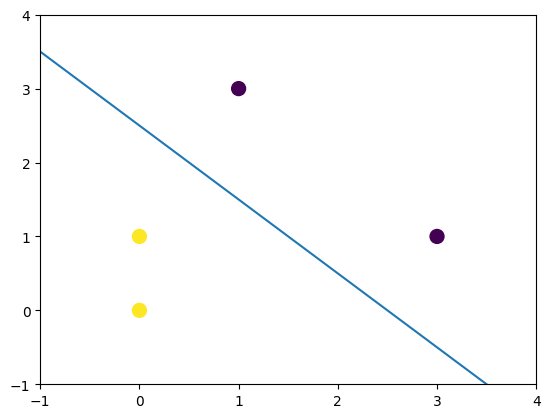

In [122]:
# Play around with x to see how the points affect the seperator
x = np.array([[1, 3], [3, 1], [0, 0],[0, 1]])
y = np.array([-1,-1,1,1])

w, b = primal(x,y)
print(w , b)

fig = plt.figure()
linear_seperator(w,b,(-1,4),(-1,4))
plot(x,y)

     pcost       dcost       gap    pres   dres
 0: -3.1343e+00  3.4488e-01  6e+00  3e+00  2e-15
 1:  3.4393e-01  4.1816e-01  2e-01  8e-02  7e-17
 2:  4.4244e-01  4.4342e-01  1e-02  3e-03  3e-16
 3:  4.4444e-01  4.4444e-01  1e-04  3e-05  9e-16
 4:  4.4444e-01  4.4444e-01  1e-06  3e-07  1e-15
 5:  4.4444e-01  4.4444e-01  1e-08  3e-09  2e-15
Optimal solution found.
[-0.6666666851824712, -0.6666666580904856] 1.6666666600816824


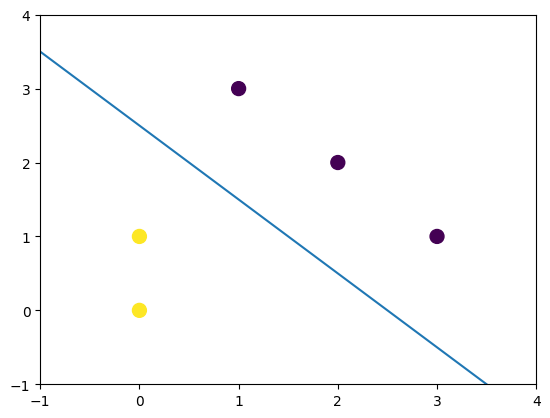

In [134]:
# Play around with x to see how the points affect the seperator
x = np.array([[1, 3], [3, 1], [0, 0],[0, 1]])
y = np.array([-1,-1,1,1])

# Add more points to explore more
X = np.concatenate((x,[[2, 2]]), axis=0)
Y = np.concatenate((y,[-1]), axis=0) # choose which class your point is for

w, b = primal(X,Y)
print(w , b)

fig = plt.figure()
linear_seperator(w,b,(-1,4),(-1,4))
plot(X,Y)

You have probably guessed it by now, this algorithm is impressive but limited to simple cases.

There are cases where a linear seperator cannot be obtained.

Feel free to run the following code to see an example of this

     pcost       dcost       gap    pres   dres
 0: -1.5042e+00  8.8726e+00  3e+01  3e+00  3e+00
 1:  5.7746e+00  2.1342e+00  4e+00  4e-16  2e-15
 2:  2.6804e+00  2.3859e+00  3e-01  3e-16  6e-16
 3:  2.4711e+00  2.4427e+00  3e-02  2e-16  2e-15
 4:  2.4448e+00  2.4444e+00  3e-04  3e-16  5e-15
 5:  2.4444e+00  2.4444e+00  3e-06  3e-16  8e-15
 6:  2.4444e+00  2.4444e+00  3e-08  3e-16  9e-15
Optimal solution found.
[-0.6666666651908133, -0.6666666416211771] 1.666666638733691


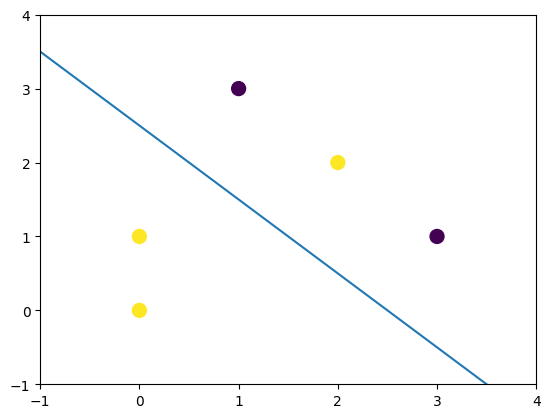

In [135]:
Y = np.concatenate((y,[1]), axis=0) # choose which class your point is for

w, b = primal(X,Y)
print(w , b)

fig = plt.figure()
linear_seperator(w,b,(-1,4),(-1,4))
plot(X,Y)

### Using Kernel SVM

Using Kernel SVM allows us to deal with non linear and higher dimensions. For this example we will be using hyperplanes using **svm** from sklearn.

## All functions used

In [136]:
def kernel_seperator(x, y, model, xlength=(-1,4), ylength=(-1,4)):
  plot_data(x,y, xlength, ylength, 100)
  xx, yy = np.meshgrid(np.linspace(xlength[0], xlength[1],50), np.linspace(ylength[0], ylength[1],100))
  xy = np.concatenate((np.reshape(xx,(xx.shape[0]*xx.shape[1],1)),np.reshape(yy,(yy.shape[0]*yy.shape[1],1))),axis=1)
  P = model.predict(xy)
  plot_data(xy,P,xlength,ylength,1)

Kernel seperator

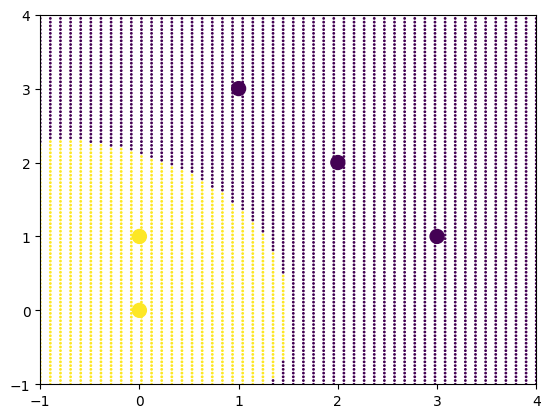

In [137]:
# Play around with x to see how the points affect the seperator
x = np.array([[1, 3], [3, 1], [0, 0],[0, 1]])
y = np.array([-1,-1,1,1])

# Add more points to explore more
X = np.concatenate((x,[[2, 2]]), axis=0)
Y = np.concatenate((y,[-1]), axis=0) # choose which class your point is for

model = svm.SVC(kernel='rbf', C=10)
model.fit(X, Y)
fig = plt.figure()
kernel_seperator(X, Y, model)

Notice how a linear SVM would have done a good job seperating the two classes here. It is important to know which type of SVM to use depending on the case.

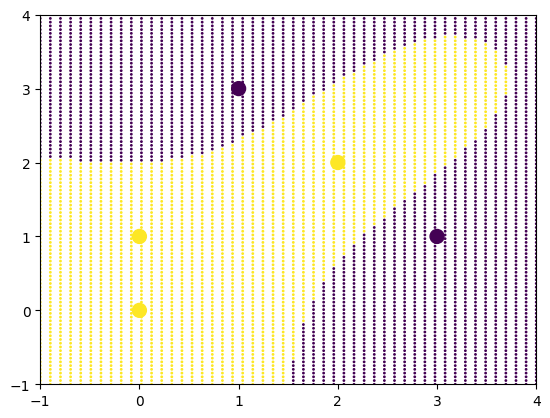

In [138]:
Y = np.concatenate((y,[1]), axis=0) # choose which class your point is for

model = svm.SVC(kernel='rbf', C=10)
model.fit(X, Y)
fig = plt.figure()
kernel_seperator(X, Y, model)

Here we can clearly see a good use of a Kernel SVM. Our points are well seperated based on their respectful classes.